In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X,train_Y),(test_X,test_Y) = fashion_mnist.load_data()

In [5]:
train_X = train_X / 255.0
test_X = test_X / 255.0

In [6]:
print(train_X.shape,test_X.shape)

(60000, 28, 28) (10000, 28, 28)


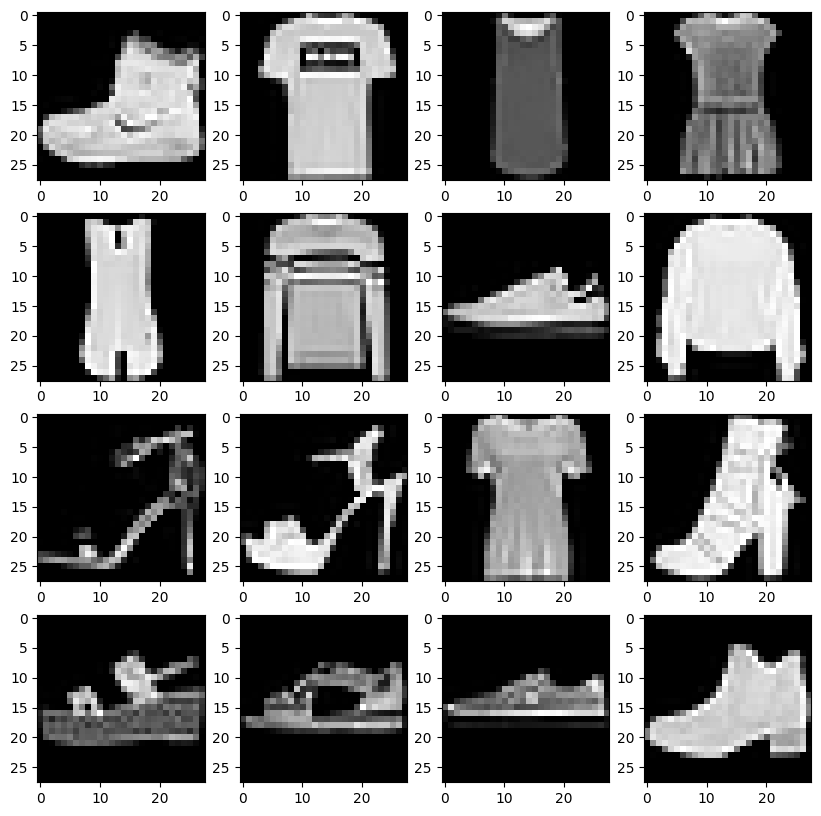

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [7]:
plt.figure(figsize=(10, 10))
for c in range(16):
    plt.subplot(4,4,c+1)
    plt.imshow(train_X[c].reshape(28,28), cmap='gray')
plt.show()
print(train_Y[:16])

In [52]:
selected_classes = {1:0,4:1,7:2,8:3}
def filterRelabel(images,labels):
    filter_indices = np.isin(labels,list(selected_classes.keys())) # train labels들중에 1,4,7,8 라벨이 포람된 인덱스들을 true로 반환
    print(filter_indices)
    filter_images = images[filter_indices]
    filter_labels = labels[filter_indices]
    new_labels = np.array([selected_classes[label] for label in filter_labels])
    return filter_images, new_labels

In [51]:
print(train_X.shape)
print(train_Y.shape)

(60000, 28, 28)
(60000,)


In [53]:
# 필터링 및 레이블 재설정
train_X_filtered, train_Y_filtered = filterRelabel(train_X, train_Y)
test_X_filtered, test_Y_filtered = filterRelabel(test_X, test_Y)

# 결과 확인
print("original Train Images Shape:", train_X.shape)
print("original Train Labels Distribution:", np.unique(train_Y, return_counts=True))
print("original Test Images Shape:", test_X.shape)
print("original Test Labels Distribution:", np.unique(test_Y, return_counts=True))
print('-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=after filtering and relabeling-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=')
print("Filtered Train Images Shape:", train_X_filtered.shape)
print("Filtered Train Labels Distribution:", np.unique(train_Y_filtered, return_counts=True))
print("Filtered Test Images Shape:", test_X_filtered.shape)
print("Filtered Test Labels Distribution:", np.unique(test_Y_filtered, return_counts=True))

[False False False ... False False False]
[False False  True ...  True  True False]
original Train Images Shape: (60000, 28, 28)
original Train Labels Distribution: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))
original Test Images Shape: (10000, 28, 28)
original Test Labels Distribution: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=after filtering and relabeling-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Filtered Train Images Shape: (24000, 28, 28)
Filtered Train Labels Distribution: (array([0, 1, 2, 3]), array([6000, 6000, 6000, 6000]))
Filtered Test Images Shape: (4000, 28, 28)
Filtered Test Labels Distribution: (array([0, 1, 2, 3]), array([1000, 1000, 1000, 1000]))


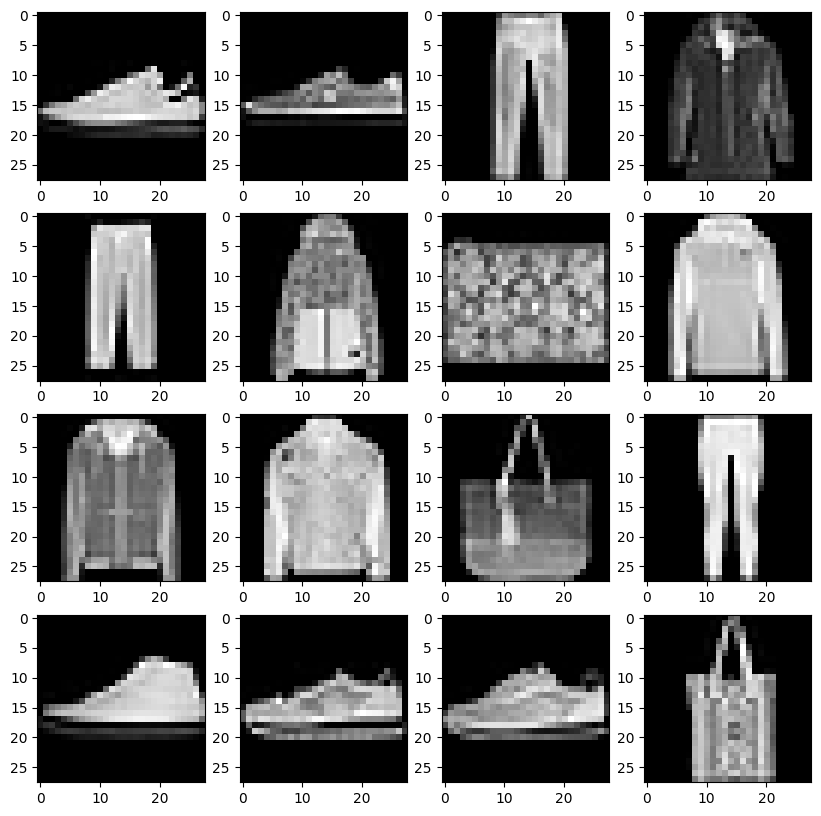

[2 2 0 1 0 1 3 1 1 1 3 0 2 2 2 3]


In [12]:
plt.figure(figsize=(10, 10))
for c in range(16):
    plt.subplot(4,4,c+1)
    plt.imshow(train_X_filtered[c].reshape(28,28), cmap='gray')
plt.show()
print(train_Y_filtered[:16])

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), 
                           kernel_size=(5,5),
                           strides=(1, 1), 
                           padding='same', 
                           filters=20),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    tf.keras.layers.Conv2D(kernel_size=(5,5),
    strides=(1, 1), padding='same', filters=50),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=500),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(units=4),
    tf.keras.layers.Softmax()
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 20)     │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 28, 28, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 50)     │        25,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 14, 14, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2450)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 500)            │     1,225,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         2,004 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_2 (Softmax)             │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,253,074 (4.78 MB)

 Trainable params: 1,253,074 (4.78 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X_filtered, train_Y_filtered , batch_size=36, epochs=10, validation_split=0.25)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.9467 - loss: 0.1543 - val_accuracy: 0.9910 - val_loss: 0.0299
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - accuracy: 0.9920 - loss: 0.0270 - val_accuracy: 0.9917 - val_loss: 0.0287
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.9953 - loss: 0.0156 - val_accuracy: 0.9917 - val_loss: 0.0270
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.9951 - loss: 0.0144 - val_accuracy: 0.9945 - val_loss: 0.0217
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.9977 - loss: 0.0086 - val_accuracy: 0.9947 - val_loss: 0.0206
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - accuracy: 0.9981 - loss: 0.0049 - val_accuracy: 0.9943 - val_loss: 0.0233
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.9984 - loss: 0.0053 - val_accuracy: 0.9938 - val_loss: 0.0290
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9990 - loss: 0.0037 - 

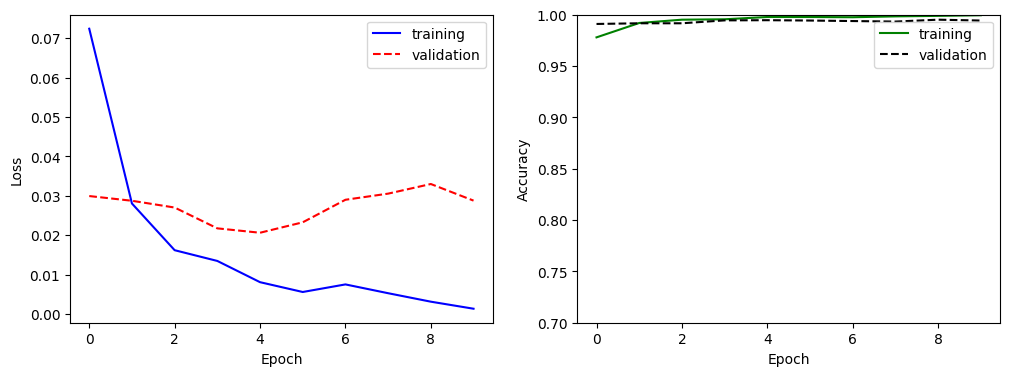

In [28]:
plt.figure(figsize=(12, 4)), plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='training')
plt.plot(history.history['val_loss'], 'r--', label='validation')

plt.xlabel('Epoch'), plt.ylabel('Loss'), plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='training')
plt.plot(history.history['val_accuracy'], 'k--', label='validation')
plt.xlabel('Epoch'), plt.ylabel('Accuracy'), plt.ylim(0.7, 1), plt.legend()

plt.show()

In [29]:
model.evaluate(test_X_filtered,test_Y_filtered,verbose=True)

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9946 - loss: 0.0213


[0.023308061063289642, 0.9944999814033508]

In [32]:
model.evaluate(train_X_filtered,train_Y_filtered,verbose=True)

750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9993 - loss: 0.0024


[0.0083309942856431, 0.9981666803359985]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
2
[[0.01617152 0.02181277 0.6637777  0.298238  ]]


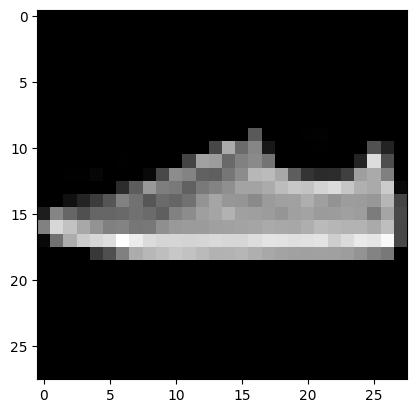

In [31]:
# Evaluate a single image
img = test_X_filtered[70]
pre_img = tf.expand_dims(img, axis=0)
pre_img = tf.expand_dims(pre_img, axis=-1)

pre_img = pre_img/255
pred = model.predict(pre_img)
plt.imshow(img,'gray')
import numpy as np
print(np.argmax(pred))
print(pred)

(28, 28)
(1, 28, 28)
(28, 1, 28)
(28, 28, 1)
(28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


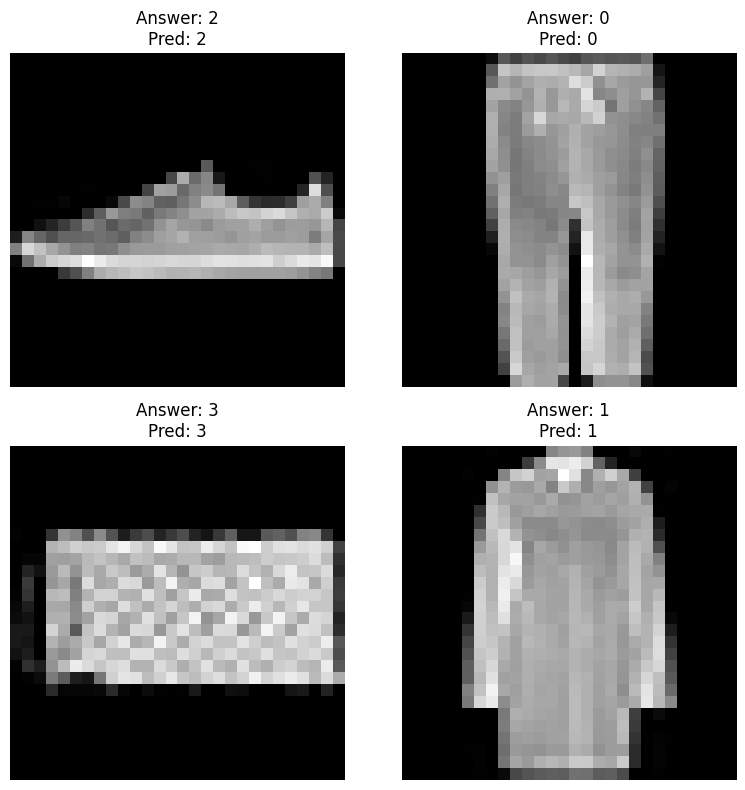

In [44]:
# 이미지와 정답 데이터
imgs = [test_X_filtered[70], test_X_filtered[82], test_X_filtered[84], test_X_filtered[69]]
answers = [test_Y_filtered[70], test_Y_filtered[82], test_Y_filtered[84], test_Y_filtered[69]]
print(test_X_filtered[70].shape)
print(tf.expand_dims(img, axis=0).shape)
print(tf.expand_dims(img, axis=1).shape)
print(tf.expand_dims(img, axis=2).shape)
print(tf.expand_dims(img, axis=-1).shape)


# 모델 예측  (tf.expand_dims(img, axis=0)) 
preds = [model.predict(tf.expand_dims(tf.expand_dims(img, axis=0),axis=-1))[0].argmax() for img in imgs]

# 시각화
fig, axes = plt.subplots(2, 2, figsize=(8, 8))  # 2x2 그래프
for i, ax in enumerate(axes.flat):
    ax.imshow(imgs[i], cmap='gray')  # 이미지 출력
    ax.set_title(f"Answer: {answers[i]}\nPred: {preds[i]}")  # 제목 설정
    ax.axis('off')  # 축 숨기기

plt.tight_layout()  # 레이아웃 조정
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
answer :  3
pred :  0


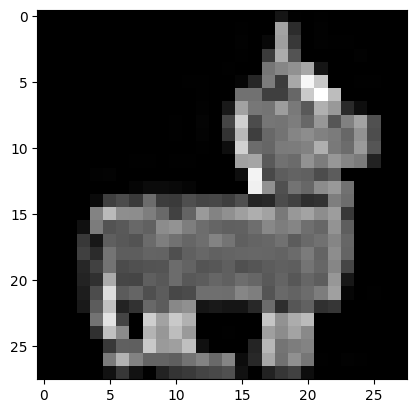

In [46]:
img = test_X_filtered[527]
pred = model.predict(tf.expand_dims(tf.expand_dims(img, axis=0),axis=-1)) # tf와 같은 경우는 img를 3차원 형태로 넣어줘야함 맨 앞차원은 배치 사이즈로
plt.imshow(img,'gray')
print("answer : ",test_Y_filtered[527])
print("pred : ", pred[0].argmax())

In [48]:
print(test_X_filtered.shape)

(4000, 28, 28)


In [49]:
import numpy as np

# 모델의 예측값 계산
test_X_filtered_expanded_dims = tf.expand_dims(test_X_filtered,axis=-1)
predictions = model.predict(test_X_filtered_expanded_dims)  # 예측값 계산 (배치 전체 예측)
predicted_labels = np.argmax(predictions, axis=1)  # 각 샘플의 예측 클래스

# 정답값
true_labels = np.array(test_Y_filtered)  # 정답값 배열로 변환

# 예측이 틀린 인덱스 찾기
incorrect_indices = np.where(predicted_labels != true_labels)[0]

print(f"총 {len(incorrect_indices)}개의 예측 오류가 있습니다.")
print("예측 오류 인덱스:", incorrect_indices)

# 예를 들어, 첫 번째 오류의 정보 출력
if len(incorrect_indices) > 0:
    first_incorrect_idx = incorrect_indices[0]
    print(f"첫 번째 오류 - 인덱스: {first_incorrect_idx}")
    print(f"정답: {true_labels[first_incorrect_idx]}, 예측: {predicted_labels[first_incorrect_idx]}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
총 22개의 예측 오류가 있습니다.
예측 오류 인덱스: [ 212  527  594  598  634  648  969 1003 1228 1722 1963 2074 2208 2259
 2313 2524 3112 3220 3428 3792 3856 3955]
첫 번째 오류 - 인덱스: 212
정답: 3, 예측: 1
